<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.



## Noel: 
What is EDA? In statistics, exploratory data analysis (EDA) is an approach to analyse data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

#### Package imports

In [68]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

## Noel:
### Sneak peak Sat_score.csv from Excel:
<img src="https://i.imgur.com/XRiRXyf.jpg" >
### So desired output should look like this:

## CSV to Python Dictionary.
In order to do this, must first understand what is the final output should look like.
A CSV is actually a list of dictionaries. 
Think of the list as the ROWS containing the VALUES, and the DICTIONARY as the COLUMNS. The COLUMNS HEADERS would be used as the KEYS.

### Question 1.2 => Part 1: Convert Dictionary to Pandas DataFrame. 

## Failed Attempt 1: Wrong output
Reference: https://overlaid.net/2016/02/04/convert-a-csv-to-a-dictionary-in-python/

In [69]:
import csv
reader = csv.DictReader(open('sat_scores.csv', 'rb')) # tells the interpreter to read the CSV as a dictionary
dict_list = []                                        # Empty your dictionary
for line in reader:                                   # each line in “reader” and append the output to our list. 
    dict_list.append(line)
dict_list[0:5]                                       #dist_list is long list. So [0:5] shows top 5 lines.

[{'Math': '510', 'Rate': '82', 'State': 'CT', 'Verbal': '509'},
 {'Math': '513', 'Rate': '81', 'State': 'NJ', 'Verbal': '499'},
 {'Math': '515', 'Rate': '79', 'State': 'MA', 'Verbal': '511'},
 {'Math': '505', 'Rate': '77', 'State': 'NY', 'Verbal': '495'},
 {'Math': '516', 'Rate': '72', 'State': 'NH', 'Verbal': '520'}]

## Failed Attempt 2: Using .to_dict() method.
Reference: https://stackoverflow.com/questions/6740918/creating-a-dictionary-from-a-csv-file <br>
Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [70]:
import pandas as pd
pp = pd.read_csv('sat_scores.csv', header=0, index_col=0, squeeze=True).to_dict()
#pp 

## Working attempt 1, using to_dict() method. 
Argurment 'orient' determines the type of the values of the dictionary. In this case we want LIST.

Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html

In [71]:
import pandas as pd
data1 = pd.read_csv('sat_scores.csv').to_dict(orient='list')
#print data1   # Yes it works.

###  Done!! CSV ==> Dictionary. 
#### 4x elements of dictionary since we have 4x columns. Headers as Dictionary Keys, values as Dictionary Values arranged in LIST. 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

## Noel:
### Question 1.2 => Part 2: Convert CSV to Pandas DataFrame using .read_csv. 

In [72]:
import pandas as pd
sat_scores = pd.read_csv('sat_scores.csv')
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [73]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### Noel :
- A 'Data Dictionary' is a set of information describing the contents, format, and structure of a database and the relationship between its elements, used to control access to and manipulation of the database.
- Common Pandas function used are: shape, columns, dtypes, info, describe and index. 
- Explaination are written below.

In [74]:
sat_scores.shape

(52, 4)

In [75]:
sat_scores.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [76]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [77]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [78]:
sat_scores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [79]:
sat_scores.index

RangeIndex(start=0, stop=52, step=1)

#                                                    Data Dictionary


<img src="https://i.imgur.com/vrPPq6f.jpg" >

# <img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [80]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

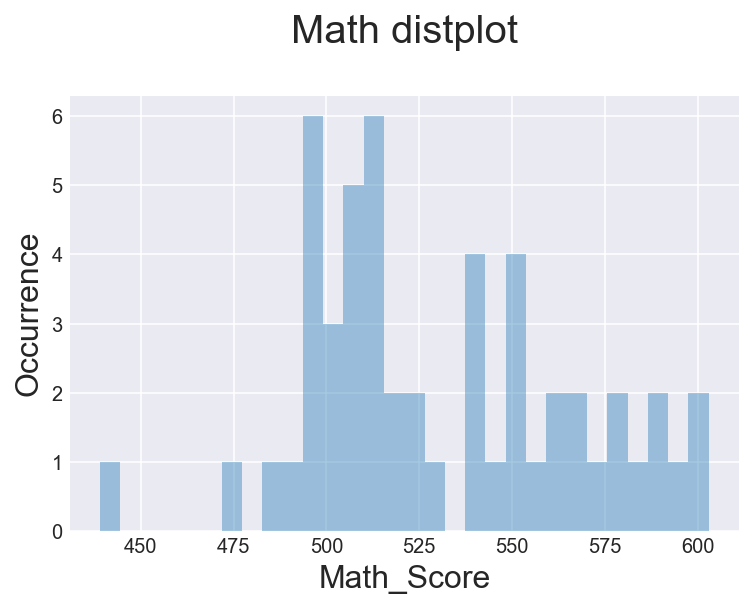

In [81]:
ax1 = sns.distplot(sat_scores.Math, bins=30, kde=False)
ax1.set_xlabel('Math_Score', fontsize=16)
ax1.set_ylabel('Occurrence', fontsize=16)
ax1.set_title('Math distplot\n', fontsize=20)
plt.show()


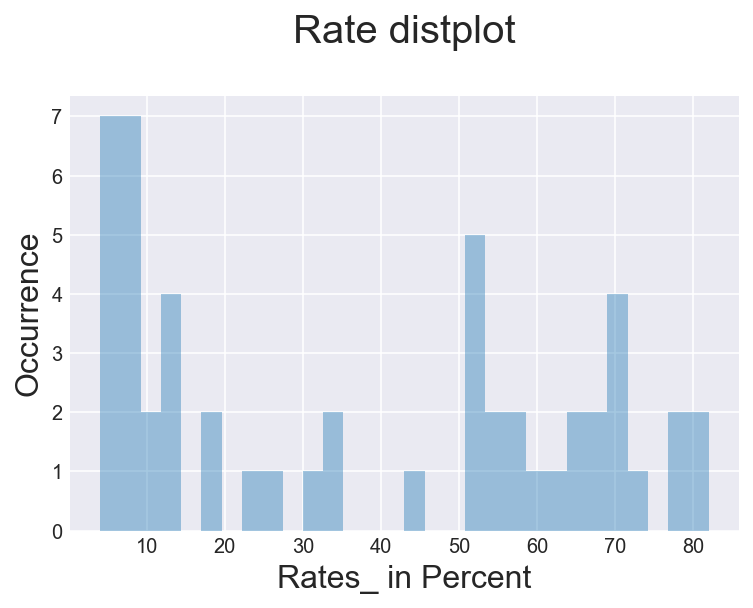

In [82]:
ax1 = sns.distplot(sat_scores.Rate, bins=30, kde=False)
ax1.set_xlabel('Rates_ in Percent', fontsize=16)
ax1.set_ylabel('Occurrence', fontsize=16)
ax1.set_title('Rate distplot\n', fontsize=20)
plt.show()

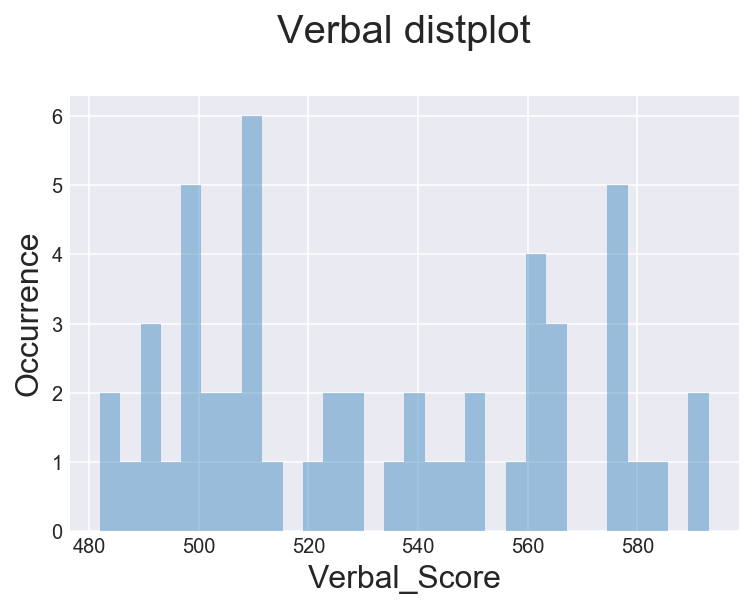

In [83]:
ax1 = sns.distplot(sat_scores.Verbal, bins=30, kde=False)
ax1.set_xlabel('Verbal_Score', fontsize=16)
ax1.set_ylabel('Occurrence', fontsize=16)
ax1.set_title('Verbal distplot\n', fontsize=20)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

### Noel:
- Pair plot shows the relationships of 2x varable in a dataset.
- The diagonal plots (i.e "1,1", "2,2", "3,3") shows the distribution. Its the same in Question 3.1.
- Focus on bottom half. 
- Position 3,1, shows the relationship between Math and Rate.
- Position 3,2, shows the relationship between Math and Verbal.
- Position 2,1, shows the relationship between Verbal and Rate.
- The top half is just the same copy, hence symmetrical.

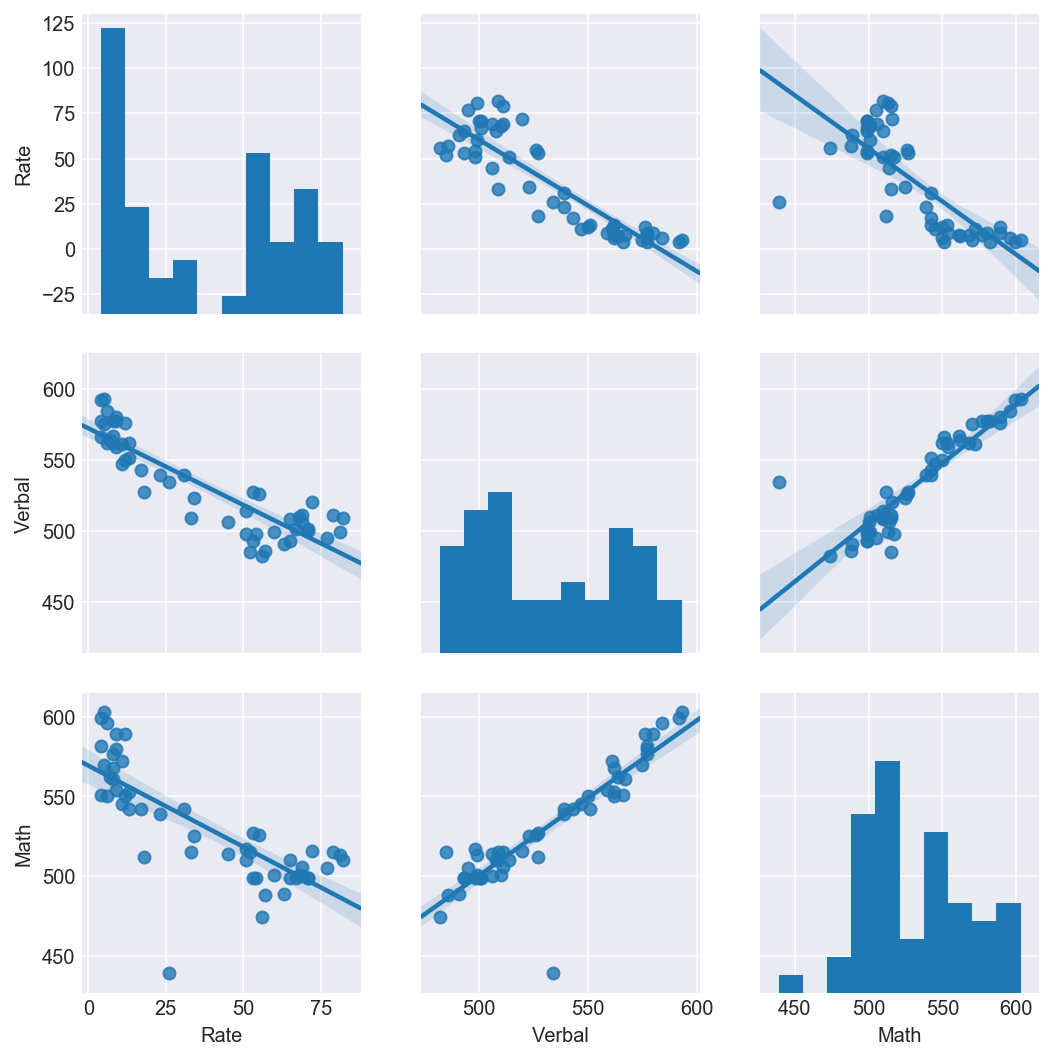

In [84]:
sns.pairplot(sat_scores, kind='reg')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

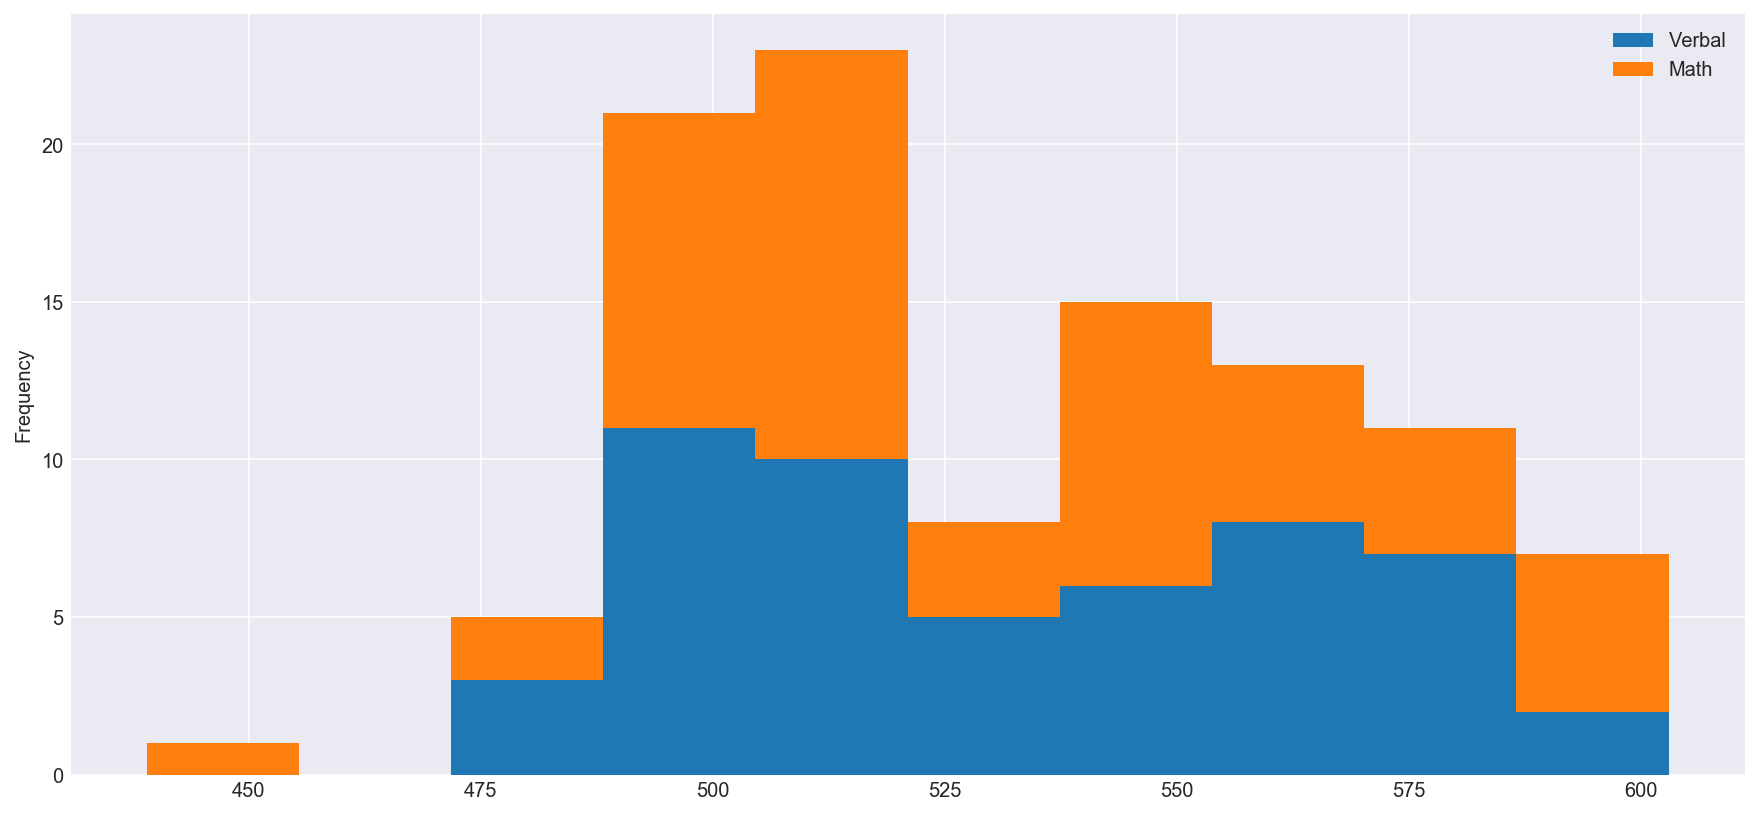

In [85]:
import matplotlib.pyplot as plt
sat_scores[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(15,7))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

## Noel:
### Question 4.2 Part 1: What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
- I think it doesn't have an advantage over the other, all plots is showing different information.
- Boxplot gives a number of details, such as : minimum, first quartile, median, third quartile, and maximum.
- Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.
- Histogram is used to plot the frequency of score occurrences in a continuous data set that has been divided into classes, called bins. 

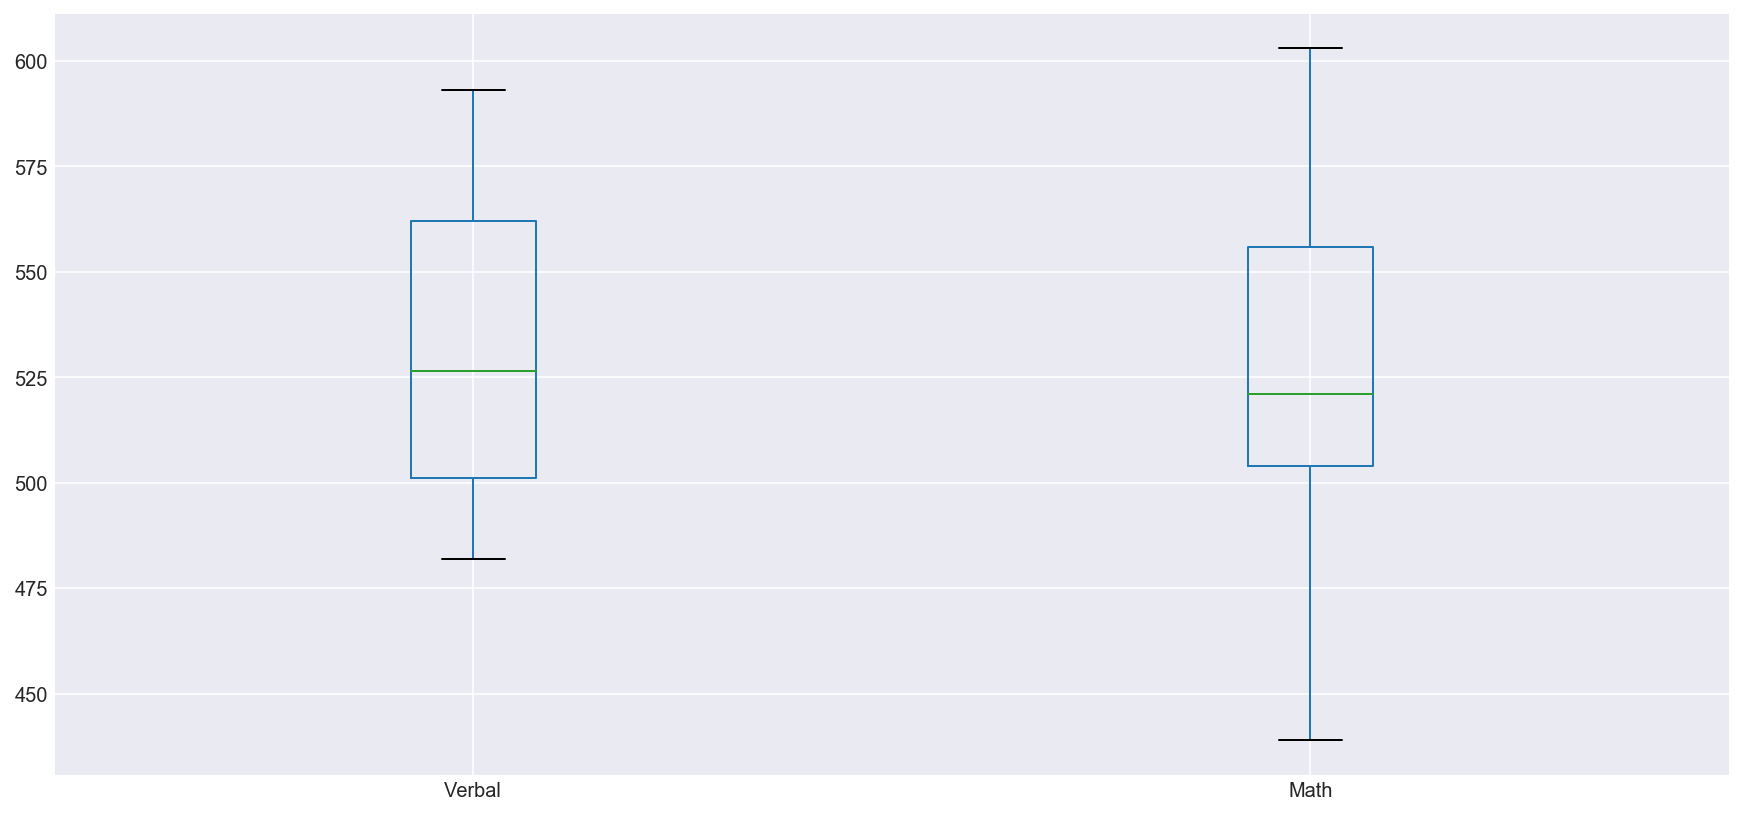

In [86]:
sat_scores[['Verbal', 'Math']].plot(kind='box', figsize=(15,7))

### Question 4.2 Part 2: What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
- Rates have units in Percentage ranged 0% to 100%, whereas Verbal and Math in scores range as high as 800. If plot all 3 together is meaningless, and only makes the plot unreadable.

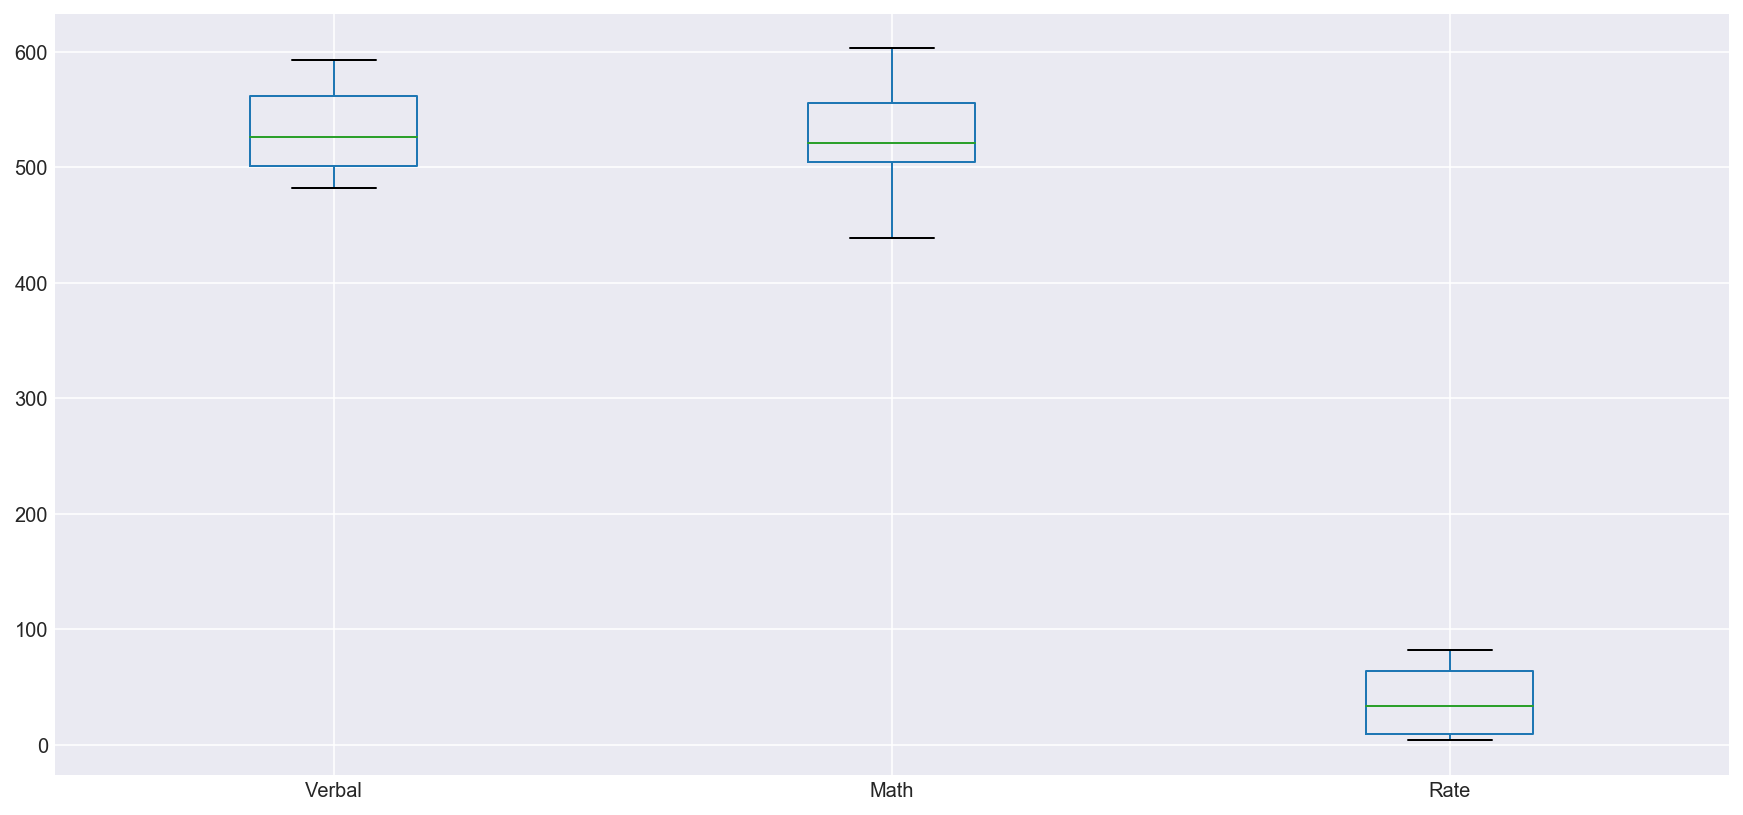

In [87]:
sat_scores[['Verbal', 'Math', 'Rate']].plot(kind='box', figsize=(15,7))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### Noel:
- To make sense on the same chart, all 3 variable had to be of the same unit. 
- We can convert Math and Verbal to percentage by dividing to its full score 800.
- Then replot as shown below.

In [88]:
sat_scores['Verbal_percent'] = (sat_scores['Verbal'] / 800) * 100
sat_scores['Math_percent'] = (sat_scores['Math'] / 800) * 100

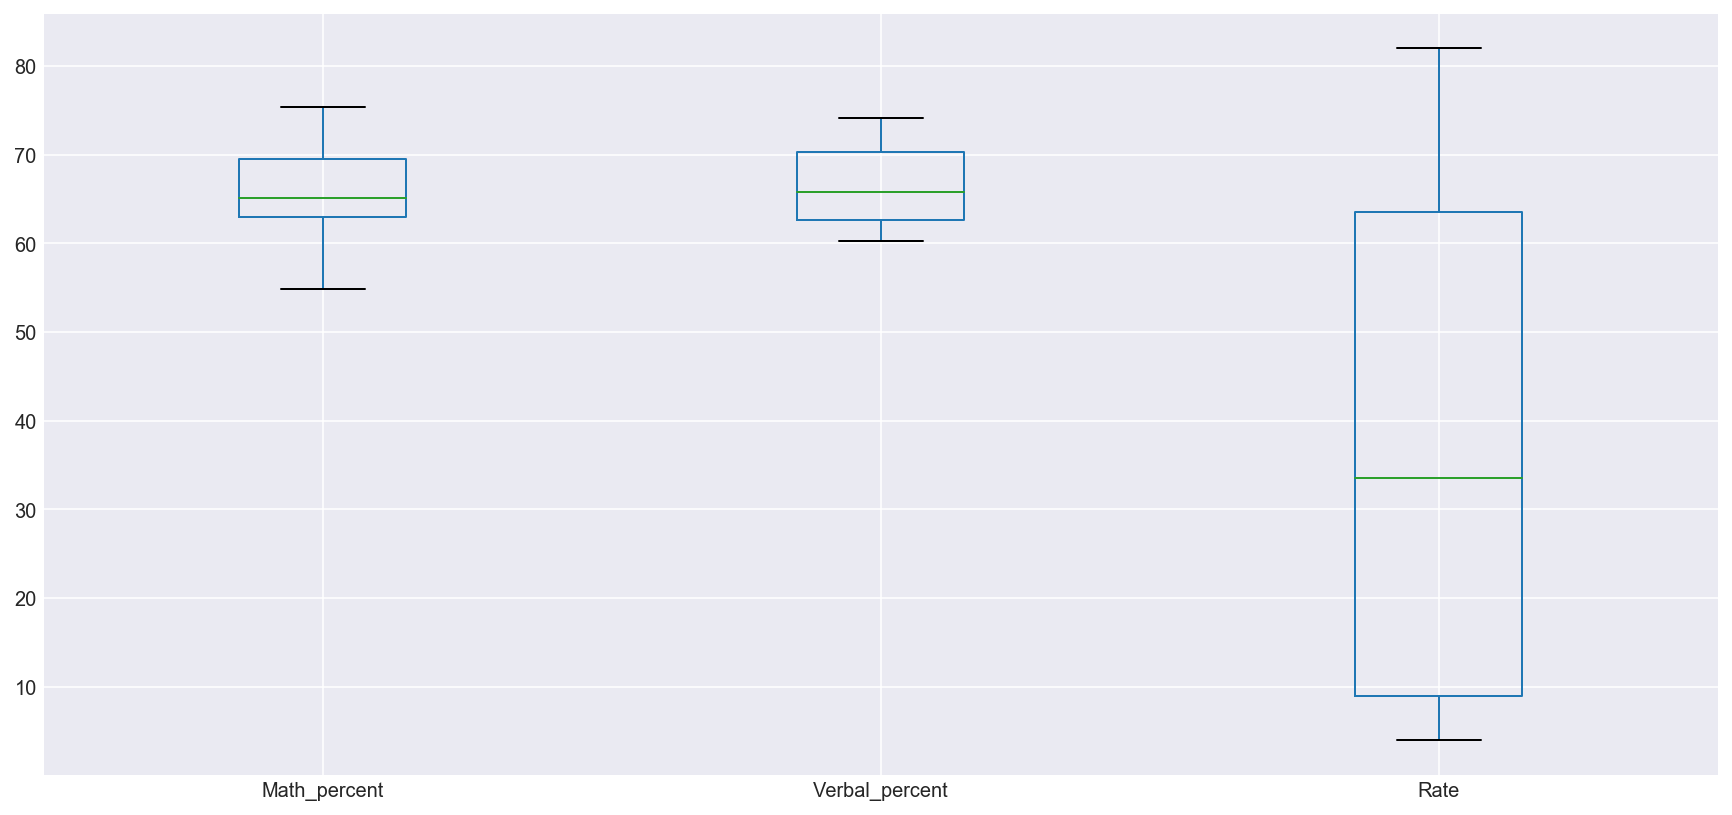

In [89]:
sat_scores[['Math_percent', 'Verbal_percent', 'Rate']].plot(kind='box', figsize=(15,7))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




# Noel:
- There are 24 states that have Verbal scores greater than average Verbal scores. See .count()
- State_V_vs_M below is showing the list of States.

In [90]:
sat_scores['Verbal'].mean()

532.0192307692307

In [91]:
sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean()].count()

State             24
Rate              24
Verbal            24
Math              24
Verbal_percent    24
Math_percent      24
dtype: int64

In [92]:
State_V_vs_M = list(sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean()]['State'])
print State_V_vs_M

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

# Noel:
- There are 26 states that have Verbal scores greater than the median of Verbal scores. See .count() below.
- State_V_vs_Med below is showing the list of States.

In [93]:
sat_scores['Verbal'].median()

526.5

In [94]:
sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].median()].count()

State             26
Rate              26
Verbal            26
Math              26
Verbal_percent    26
Math_percent      26
dtype: int64

In [95]:
State_V_vs_Med = list(sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].median()]['State'])
print State_V_vs_Med

['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [96]:
sat_scores['Difference'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Verbal_percent,Math_percent,Difference
0,CT,82,509,510,63.625,63.750,-1
1,NJ,81,499,513,62.375,64.125,-14
2,MA,79,511,515,63.875,64.375,-4
3,NY,77,495,505,61.875,63.125,-10
4,NH,72,520,516,65.000,64.500,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

# Noel:
## Answer to 5.4 Part 1: 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math.

In [97]:
df1 = sat_scores[sat_scores['Verbal'] > sat_scores['Math']].sort_values('Difference', ascending=False)
df1.head(10)

,State,Rate,Verbal,Math,Verbal_percent,Math_percent,Difference
27,OH,26,534,439,66.750,54.875,95
29,WV,18,527,512,65.875,64.000,15
50,MS,4,566,551,70.750,68.875,15
45,AR,6,562,550,70.250,68.750,12
31,TN,13,562,553,70.250,69.125,9
9,VA,68,510,501,63.750,62.625,9
32,NM,13,551,542,68.875,67.750,9
16,DC,56,482,474,60.250,59.250,8
41,OK,8,567,561,70.875,70.125,6
8,ME,69,506,500,63.250,62.500,6


# Noel:
## Answer to 5.4 Part 2: 10 states with the greatest gap between Verbal and Math such that Math is greater than Verbal.

In [98]:
df2 = sat_scores[sat_scores['Verbal'] < sat_scores['Math']].sort_values('Difference', ascending=True)
df2.head(10)

,State,Rate,Verbal,Math,Verbal_percent,Math_percent,Difference
21,HI,52,485,515,60.625,64.375,-30
23,CA,51,498,517,62.250,64.625,-19
1,NJ,81,499,513,62.375,64.125,-14
33,IL,12,576,589,72.000,73.625,-13
44,WI,6,584,596,73.000,74.500,-12
36,MI,11,561,572,70.125,71.500,-11
3,NY,77,495,505,61.875,63.125,-10
47,IA,5,593,603,74.125,75.375,-10
37,MN,9,580,589,72.500,73.625,-9
51,All,45,506,514,63.250,64.250,-8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


# Noel:
- Correlation is a statistical technique that is used to measure and describe the STRENGTH and DIRECTION of the relationship between two variables. 
- We can put the Correlation values into a table, hence called Matrix.
- From the correlation table below, it is showing high scores of 0.899 correlation between Math and Verbal, suggesting that people who done well in Math should also do well in Verbal.

In [99]:
#sat_scores = sat_scores.drop(['Verbal_percent', 'Math_percent', 'Difference'] , axis = 1) 
# Enable above codes if sat_scores.corr() returns error, because just what I did in previous question, messed up sat_score.

sat_scores.corr()

,Rate,Verbal,Math,Verbal_percent,Math_percent,Difference
Rate,1.000000,-0.886432,-0.773746,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,0.899871,1.000000,-0.388219
Verbal_percent,-0.886432,1.000000,0.899871,1.000000,0.899871,0.052600
Math_percent,-0.773746,0.899871,1.000000,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [100]:
sat_scores.describe()  # Self explainable 

,Rate,Verbal,Math,Verbal_percent,Math_percent,Difference
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,66.502404,66.437500,0.519231
std,27.301788,33.236225,36.014975,4.154528,4.501872,15.729939
min,4.000000,482.000000,439.000000,60.250000,54.875000,-30.000000
25%,9.000000,501.000000,504.000000,62.625000,63.000000,-6.000000
50%,33.500000,526.500000,521.000000,65.812500,65.125000,0.000000
75%,63.500000,562.000000,555.750000,70.250000,69.468750,4.250000
max,82.000000,593.000000,603.000000,74.125000,75.375000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

# Noel:
#### I will answer all 3x questions below. 

- Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.
- By putting the values on a labelled table, hence called Matrix.
- However, there is a problems with Interpretation. A large covariance can mean a strong relationship between variables. However, you can’t compare variances over data sets with different scales (like pounds and inches). A weak covariance in one data set may be a strong one in a different data set with different scales. Therefore we will be hit into this question, how large is considered strong, and how small is considered weak?
- While a correlation is limited: -1 to +1.

In [101]:
sat_scores.cov()

,Rate,Verbal,Math,Verbal_percent,Math_percent,Difference
Rate,745.387632,-804.355958,-760.803922,-100.544495,-95.100490,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,138.080835,134.643382,27.499623
Math,-760.803922,1077.147059,1297.078431,134.643382,162.134804,-219.931373
Verbal_percent,-100.544495,138.080835,134.643382,17.260104,16.830423,3.437453
Math_percent,-95.100490,134.643382,162.134804,16.830423,20.266850,-27.491422
Difference,-43.552036,27.499623,-219.931373,3.437453,-27.491422,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

## Noel:
Before I can answer these questions, let me do some checks first.

In [102]:
drug = pd.read_csv('drug-use-by-age.csv')
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


-  'USE" : Percentage of those in an age group who used "XX drug" in the past 12 months
- "Freq" : Median number of times a user in an age group used "XX drug" in the past 12 months

In [103]:
# Noel: Checking for missing data. Yes, there is missing data for those below 17 count, example at cocaine-frequency, crack-frequency etc...
drug.count()

age                        17
n                          17
alcohol-use                17
alcohol-frequency          17
marijuana-use              17
marijuana-frequency        17
cocaine-use                17
cocaine-frequency          17
crack-use                  17
crack-frequency            17
heroin-use                 17
heroin-frequency           17
hallucinogen-use           17
hallucinogen-frequency     17
inhalant-use               17
inhalant-frequency         17
pain-releiver-use          17
pain-releiver-frequency    17
oxycontin-use              17
oxycontin-frequency        17
tranquilizer-use           17
tranquilizer-frequency     17
stimulant-use              17
stimulant-frequency        17
meth-use                   17
meth-frequency             17
sedative-use               17
sedative-frequency         17
dtype: int64

In [104]:
# Noel : Checking type 
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### Noel:
The checks below are checking what is causing the data type to be an 'object'.

In [105]:
drug['meth-frequency'].unique()

array(['-', '5.0', '24.0', '10.5', '36.0', '48.0', '12.0', '105.0', '2.0',
       '46.0', '21.0', '30.0', '54.0', '104.0'], dtype=object)

In [106]:
drug['crack-frequency'].unique()

array(['-', '3.0', '9.5', '1.0', '21.0', '10.0', '2.0', '5.0', '17.0',
       '6.0', '15.0', '48.0', '62.0'], dtype=object)

In [107]:
drug['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [108]:
drug['oxycontin-frequency'].unique()

array(['24.5', '41.0', '4.5', '3.0', '4.0', '6.0', '7.0', '7.5', '12.0',
       '13.5', '17.5', '20.0', '46.0', '5.0', '-'], dtype=object)

In [109]:
drug['heroin-frequency'].unique()

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'],
      dtype=object)

# Noel.:
- Some columns has the wrong type. Should be a float. They are: - cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency.
- Reason for wrong type is due to the '-' , which is causing the type to turn 'object'.
- Therefore, to answer first question: Yes, data requires cleaning.
- '-' will affect the analysis, which will lead to incorrect interpretation. 
- My approach is to replace Null to NaN, this turns series to float, which is needed for analysis.

# Let's do this cleaning.

In [110]:
dirty_columns = [ 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']
drug.replace('-', np.nan, inplace=True)
for column in dirty_columns:
    drug[column] = drug[column].apply(lambda x: float(x))
drug.dtypes   # Now check again.

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

## Noel:
## Data set is now cleaned!!

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

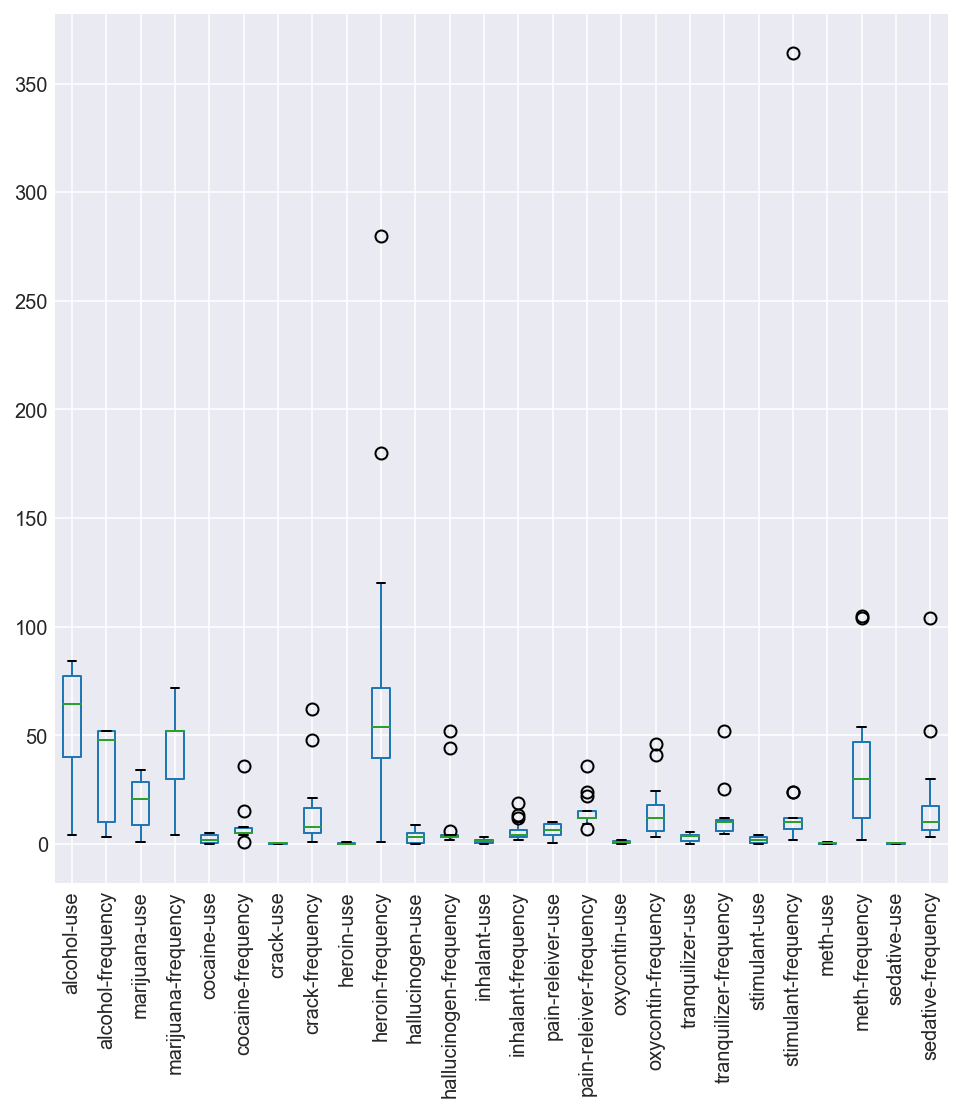

In [111]:
drug.drop(['age', 'n'],axis=1).boxplot(figsize = (8,8), rot = 90)

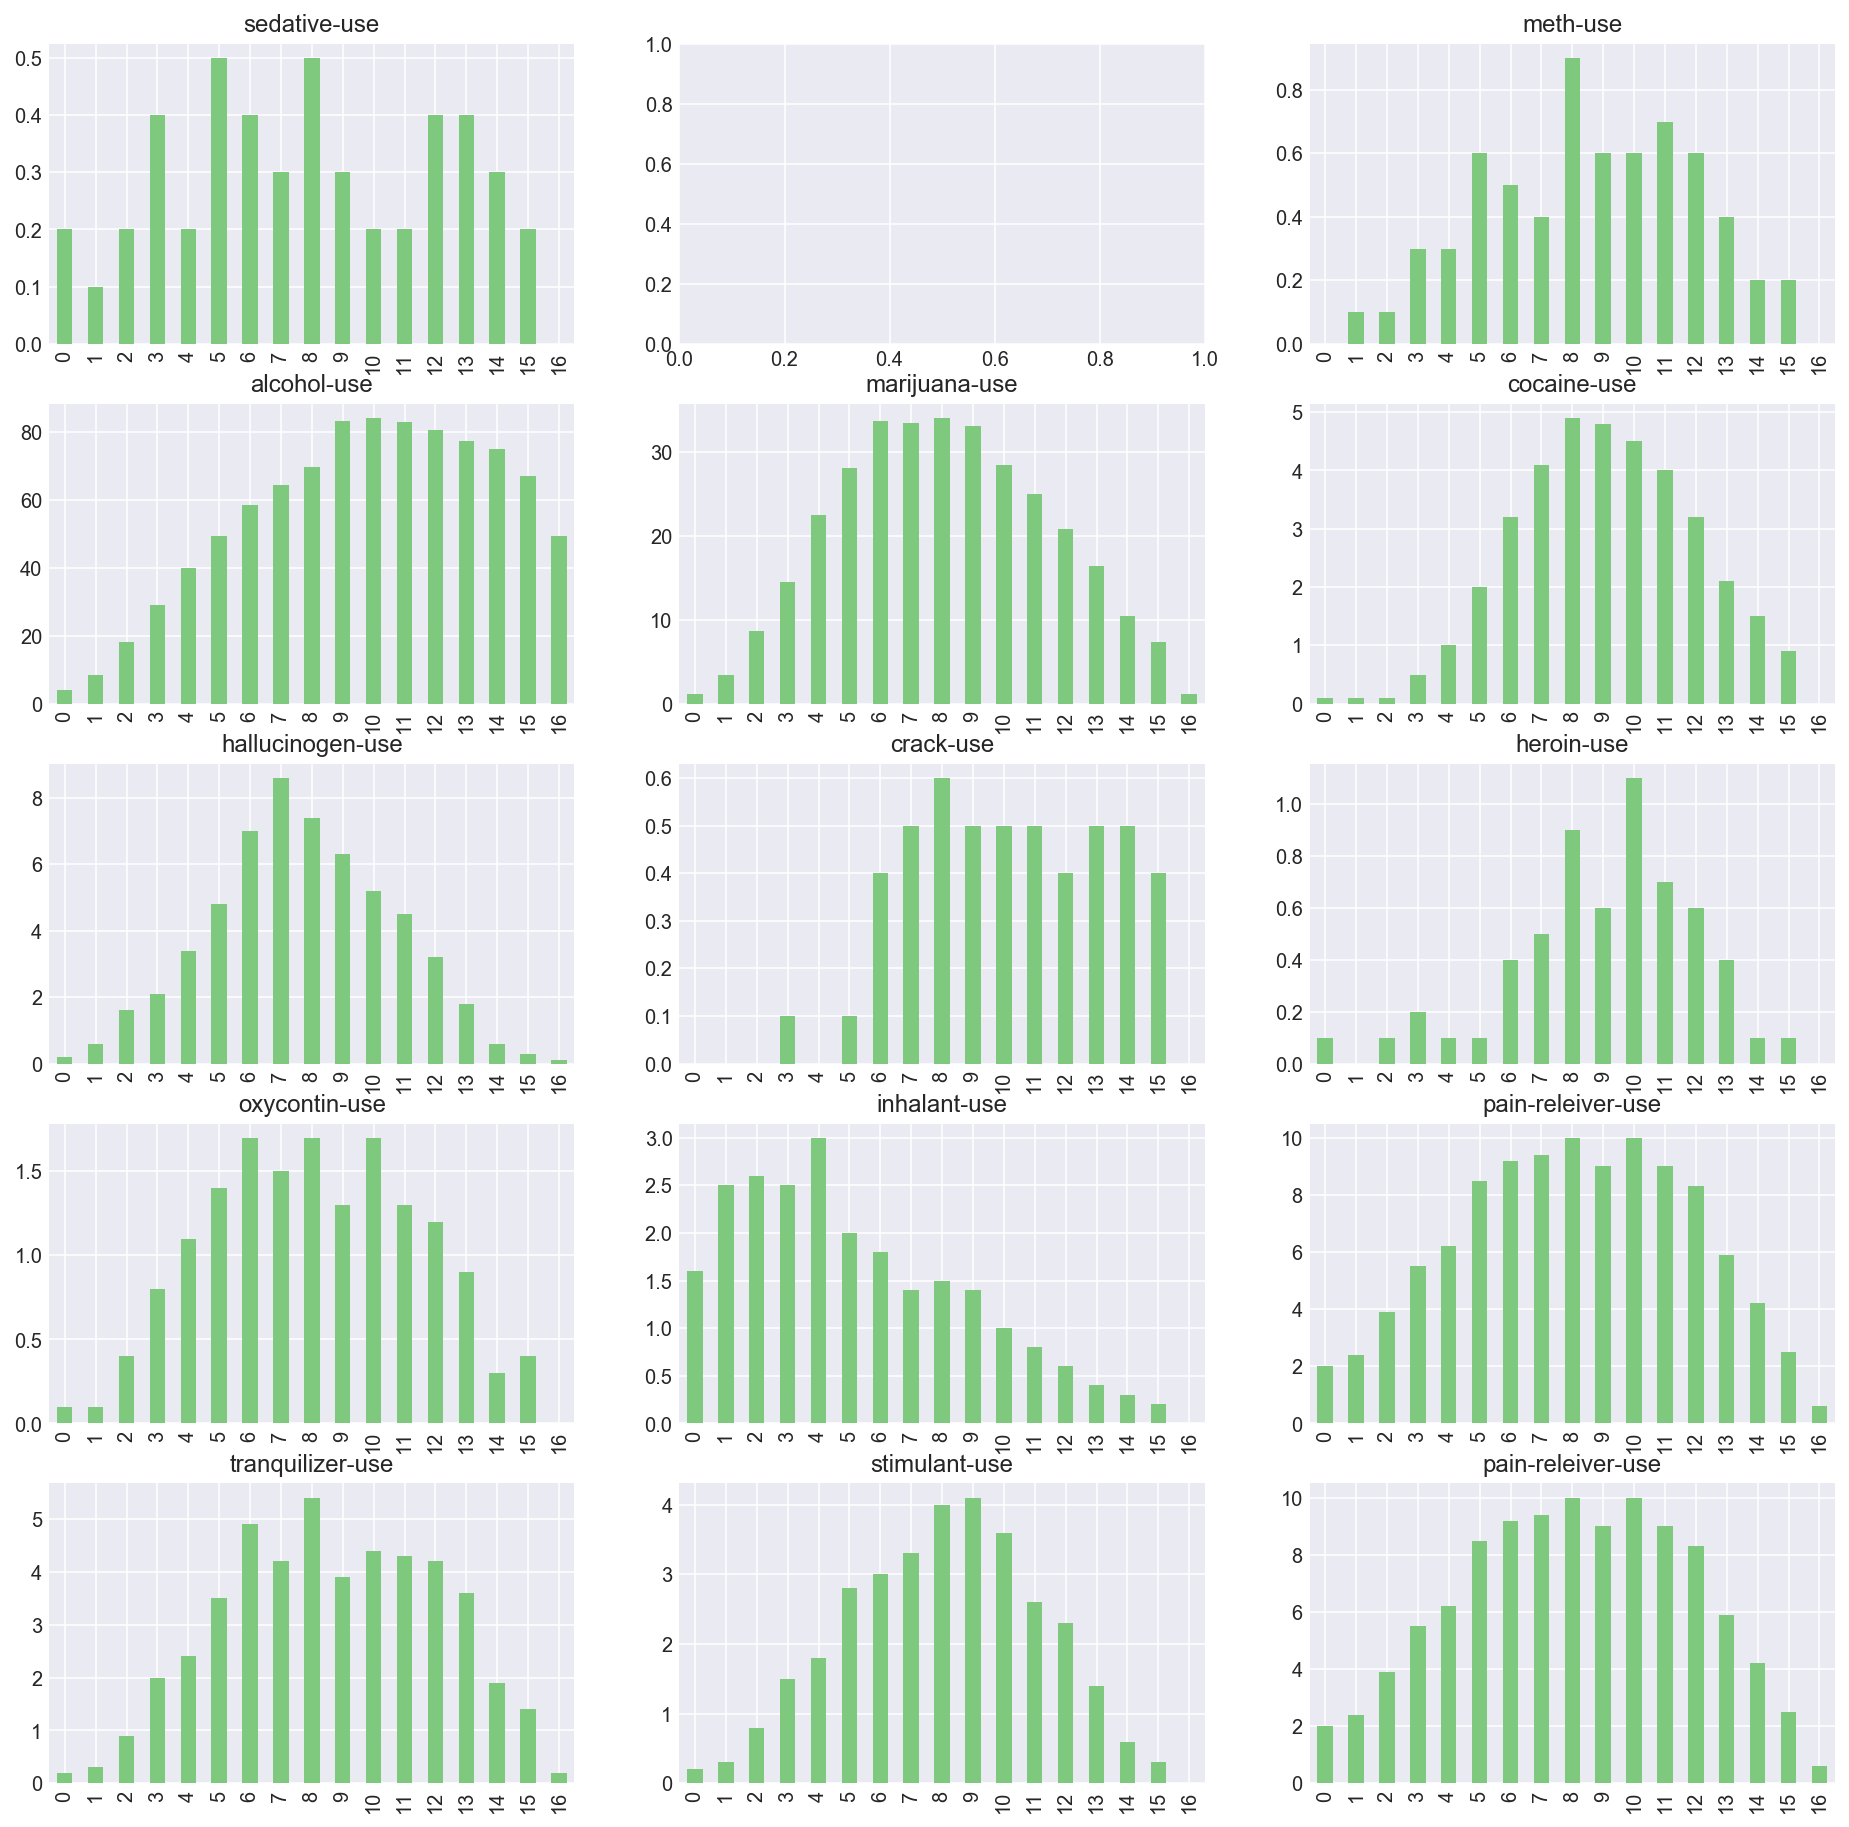

In [112]:
fig, axes = plt.subplots(5,3, figsize=(16,16))
drug['alcohol-use'].plot(ax=axes[1][0], kind='bar', title = 'alcohol-use', colormap='Accent' )
drug['marijuana-use'].plot(ax=axes[1][1], kind='bar', title = 'marijuana-use', colormap='Accent' )
drug['cocaine-use'].plot(ax=axes[1][2], kind='bar', title = 'cocaine-use', colormap='Accent' )
drug['crack-use'].plot(ax=axes[2][1], kind='bar', title = 'crack-use', colormap='Accent' )
drug['heroin-use'].plot(ax=axes[2][2], kind='bar', title = 'heroin-use', colormap='Accent' )
drug['hallucinogen-use'].plot(ax=axes[2][0], kind='bar', title = 'hallucinogen-use', colormap='Accent' )
drug['inhalant-use'].plot(ax=axes[3][1], kind='bar', title = 'inhalant-use', colormap='Accent' )
drug['pain-releiver-use'].plot(ax=axes[3][2], kind='bar', title = 'pain-releiver-use', colormap='Accent' )
drug['oxycontin-use'].plot(ax=axes[3][0], kind='bar', title = 'oxycontin-use', colormap='Accent' )
drug['pain-releiver-use'].plot(ax=axes[4][2], kind='bar', title = 'pain-releiver-use', colormap='Accent' )
drug['tranquilizer-use'].plot(ax=axes[4][0], kind='bar', title = 'tranquilizer-use', colormap='Accent' )
drug['stimulant-use'].plot(ax=axes[4][1], kind='bar', title = 'stimulant-use', colormap='Accent' )
drug['meth-use'].plot(ax=axes[0][2], kind='bar', title = 'meth-use', colormap='Accent' )
drug['sedative-use'].plot(ax=axes[0][0], kind='bar', title = 'sedative-use', colormap='Accent' )


In [113]:
drug_use = drug
drug_use = drug_use.drop( ['alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency','oxycontin-frequency', 'tranquilizer-frequency',  'stimulant-frequency', 'meth-frequency', 'sedative-frequency'], axis = 1)
drug_freq = drug
drug_freq = drug_freq.drop( ['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use','hallucinogen-use', 'inhalant-use', 'pain-releiver-use','oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use'] ,axis = 1)

In [114]:
drug_use.corr()

,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
n,1.000000,0.310512,-0.169007,-0.021565,0.281797,0.007798,-0.295302,-0.368395,-0.083587,-0.166039,-0.071086,-0.201621,-0.063571,-0.119997
alcohol-use,0.310512,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,-0.169007,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,-0.021565,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.281797,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.007798,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,-0.295302,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.368395,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,-0.083587,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,-0.166039,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929


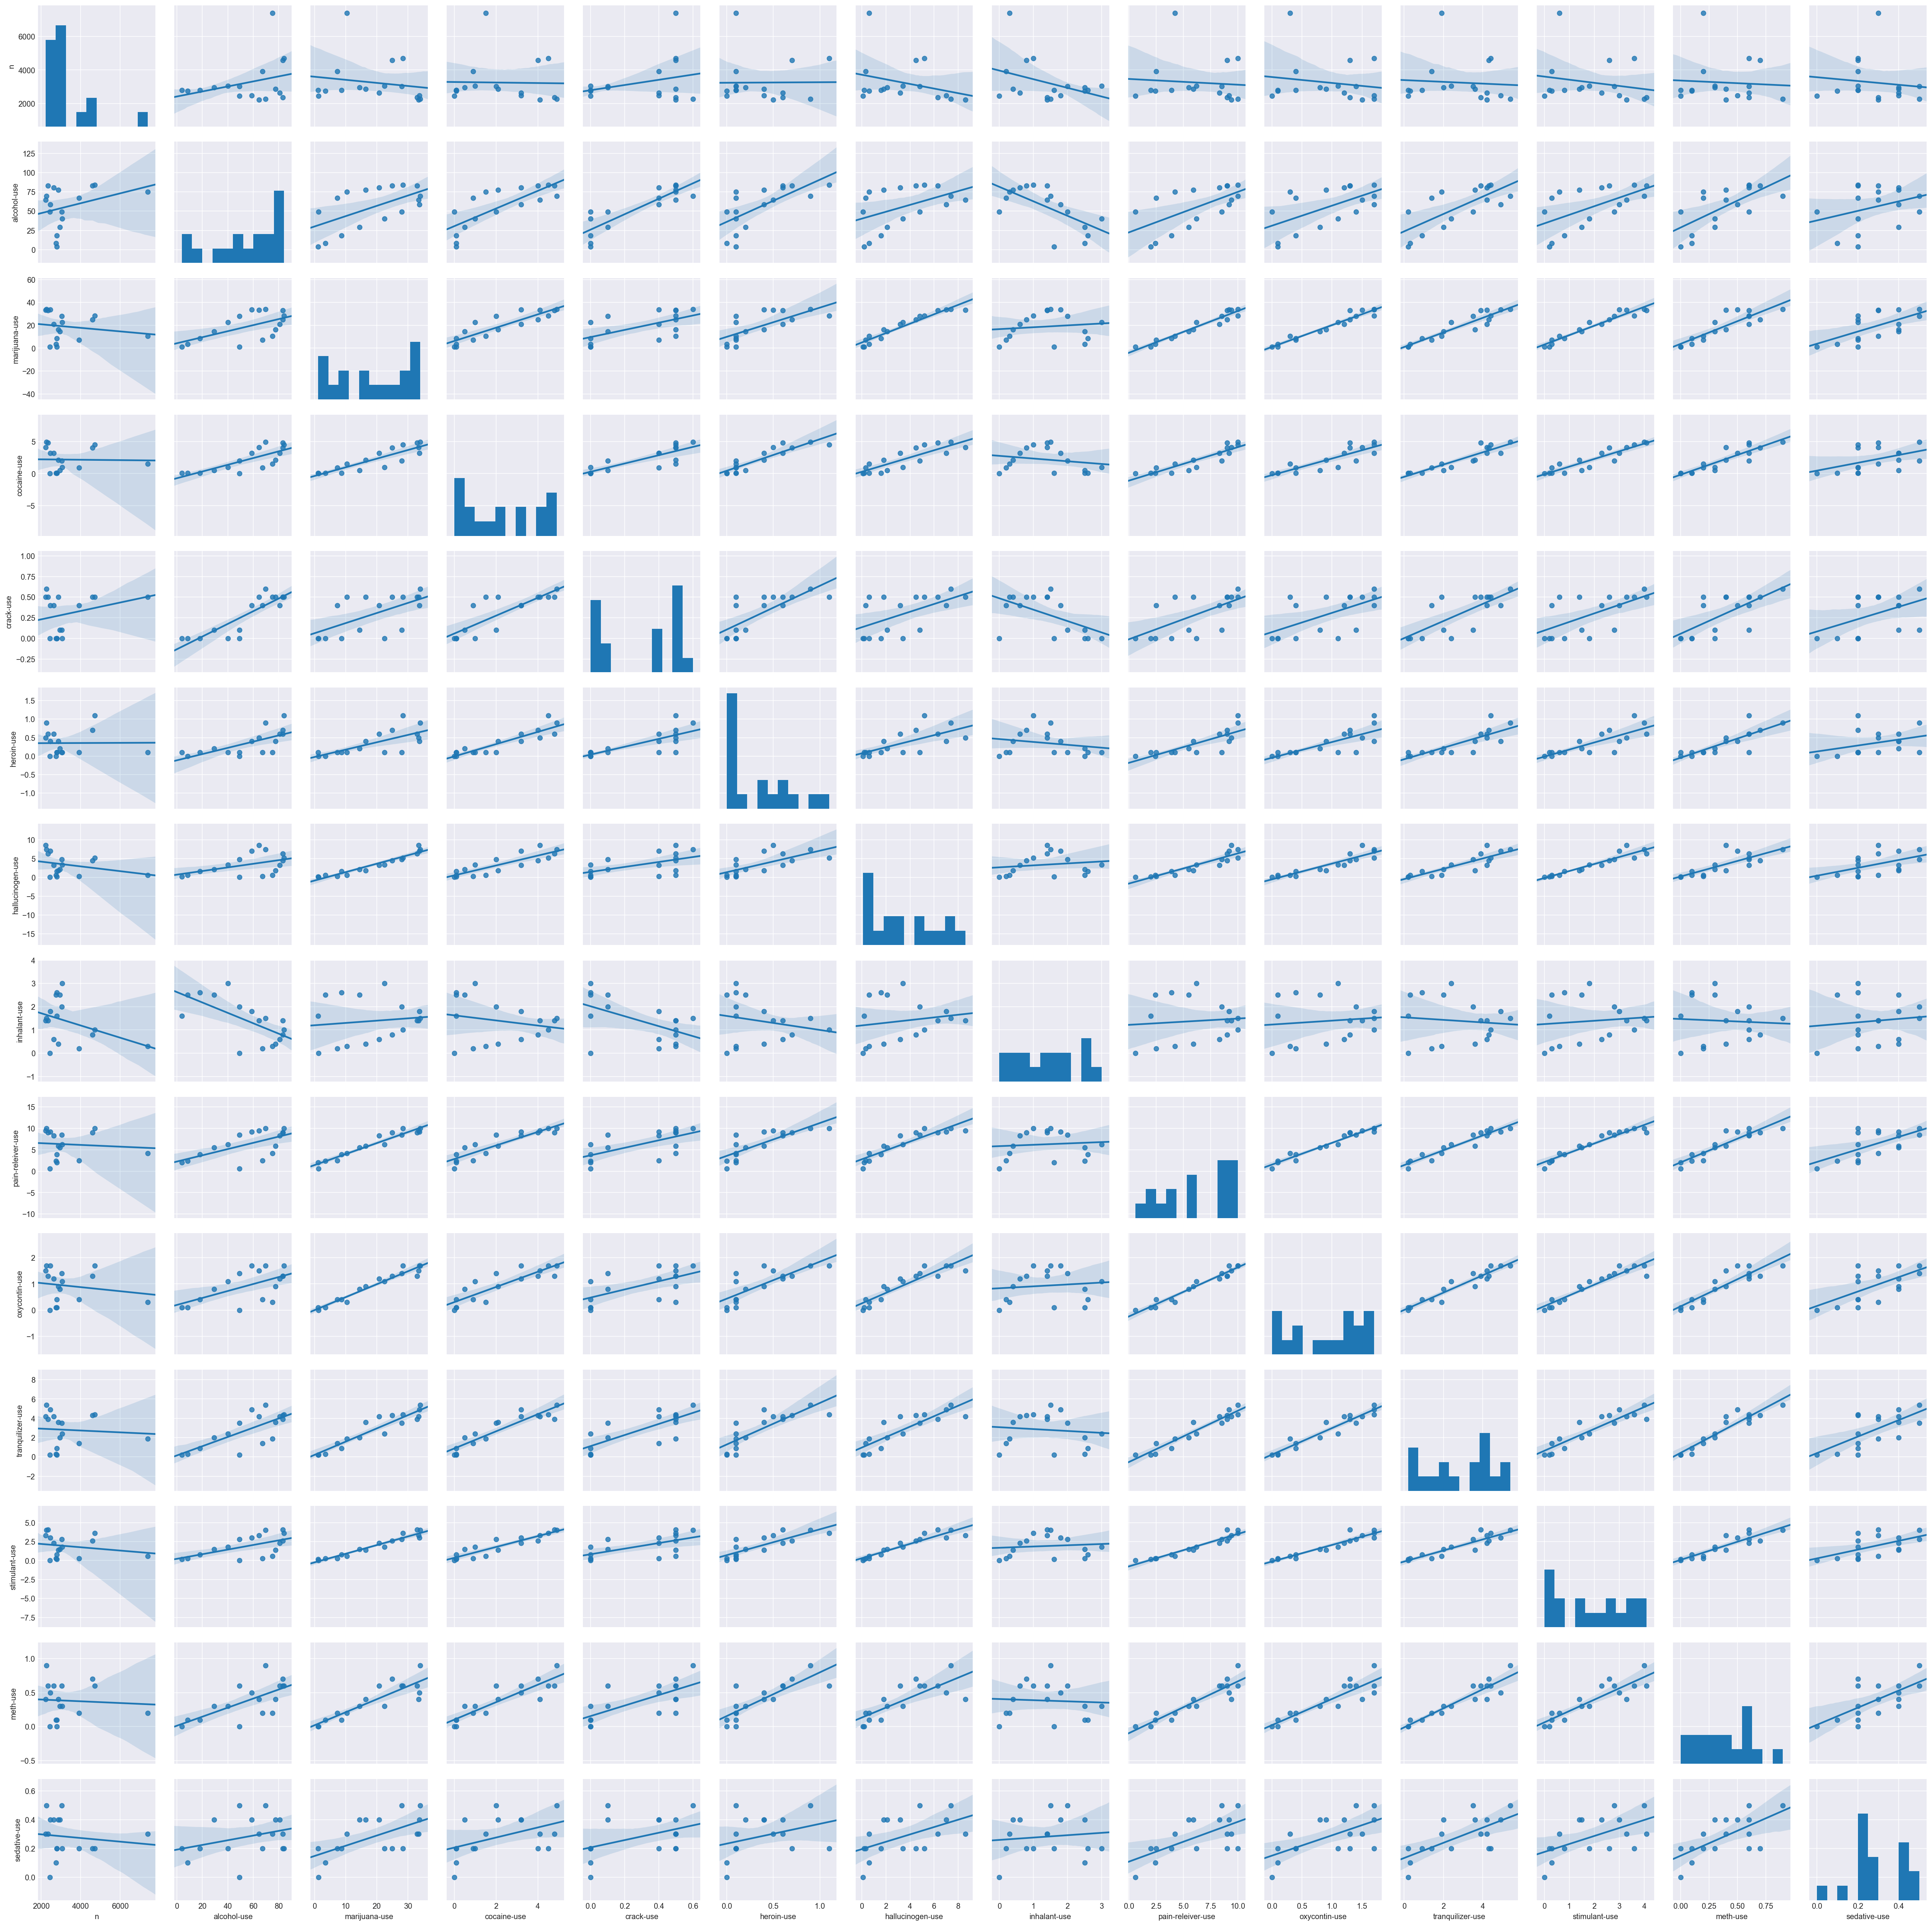

In [115]:
sns.pairplot(drug_use, kind ='reg')

In [116]:
drug_freq.corr()

,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
n,1.000000,0.313431,0.135597,0.365386,0.548114,0.615534,0.008743,0.190410,-0.112076,-0.024438,-0.102301,-0.114792,0.485909,0.256701
alcohol-frequency,0.313431,1.000000,0.818769,0.391981,0.333935,0.381874,-0.174622,-0.305296,0.007087,0.119852,-0.415026,0.260304,0.253725,0.201423
marijuana-frequency,0.135597,0.818769,1.000000,0.250348,0.113860,0.277175,-0.380430,-0.598028,-0.285292,0.040880,-0.591449,-0.069454,0.317099,0.048777
cocaine-frequency,0.365386,0.391981,0.250348,1.000000,0.875558,0.149018,0.529790,0.369098,-0.107033,-0.236768,-0.144951,0.817772,0.172758,0.773808
crack-frequency,0.548114,0.333935,0.113860,0.875558,1.000000,0.298192,0.737179,0.665838,-0.001609,-0.195650,-0.233501,0.903993,0.261224,0.611218
heroin-frequency,0.615534,0.381874,0.277175,0.149018,0.298192,1.000000,-0.205455,0.048409,-0.041496,0.039502,-0.202417,0.204941,0.873618,-0.199142
hallucinogen-frequency,0.008743,-0.174622,-0.380430,0.529790,0.737179,-0.205455,1.000000,0.846213,0.547363,0.032624,0.705734,-0.103980,-0.084470,0.533095
inhalant-frequency,0.190410,-0.305296,-0.598028,0.369098,0.665838,0.048409,0.846213,1.000000,0.587035,0.226635,0.764857,0.083121,0.045934,0.380819
pain-releiver-frequency,-0.112076,0.007087,-0.285292,-0.107033,-0.001609,-0.041496,0.547363,0.587035,1.000000,0.561735,0.699282,0.324717,0.037693,-0.045213
oxycontin-frequency,-0.024438,0.119852,0.040880,-0.236768,-0.195650,0.039502,0.032624,0.226635,0.561735,1.000000,0.412133,-0.228278,-0.053704,-0.131597


### Seems the oxycontin-use and marijuana-use are correlated.
### Below are just to visualize their relation.

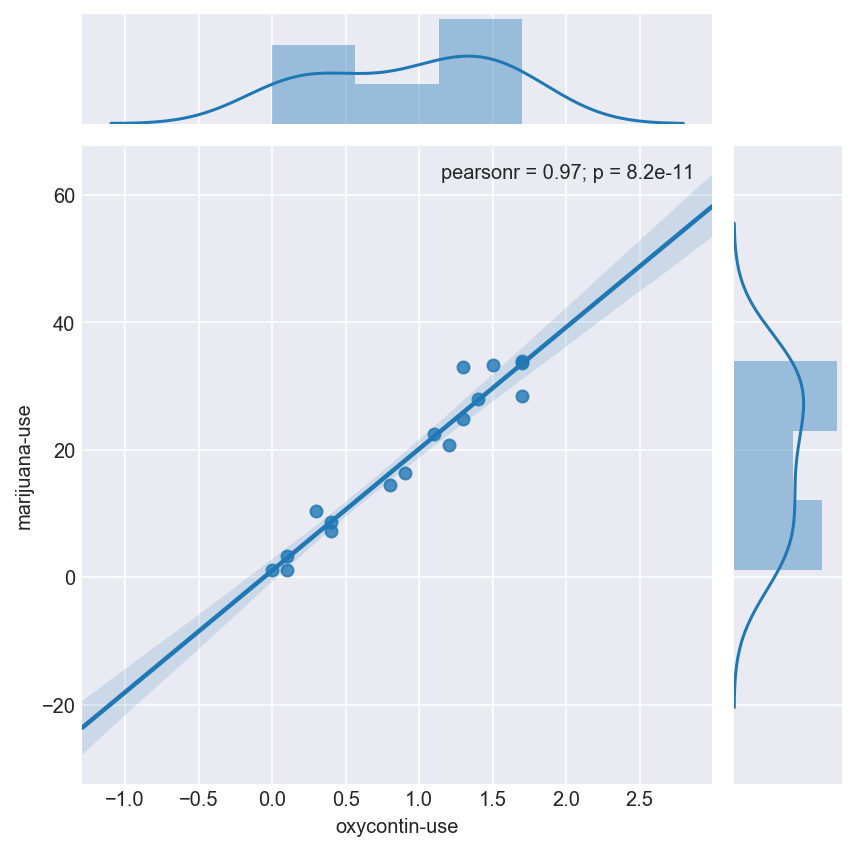

In [117]:
sns.jointplot(x=drug_use['oxycontin-use'], y=drug_use['marijuana-use'], kind='reg')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

**Report**



...

## Step 1: Define the hypotheses.
For my experiment, we will set up a null hypothesis and an alternative hypothesis:

### **Null hypothesis H0:** 
### The mean of taking marijuana age between "12-21" is the same as the mean of taking marijuana age between  "22-65+ . <br>


## Step 2: Prepare data.
> **Marijuana Data age "12-21":**   marijuana_12_21 <br>
> **Marijuana Data age "22-65+":**  marijuana_22_65

In [118]:
marijuana = drug[['marijuana-use','n', 'age']]
marijuana

,marijuana-use,n,age
0,1.1,2798,12
1,3.4,2757,13
2,8.7,2792,14
3,14.5,2956,15
4,22.5,3058,16
5,28.0,3038,17
6,33.7,2469,18
7,33.4,2223,19
8,34.0,2271,20
9,33.0,2354,21


In [119]:
marijuana['marijuana_number'] = (marijuana['n'] * marijuana['marijuana-use']) / 100
marijuana

C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,marijuana-use,n,age,marijuana_number
0,1.1,2798,12,30.778
1,3.4,2757,13,93.738
2,8.7,2792,14,242.904
3,14.5,2956,15,428.620
4,22.5,3058,16,688.050
5,28.0,3038,17,850.640
6,33.7,2469,18,832.053
7,33.4,2223,19,742.482
8,34.0,2271,20,772.140
9,33.0,2354,21,776.820


In [120]:
marijuana_12_21 = marijuana.iloc[0:9, 3: ]
marijuana_12_21

,marijuana_number
0,30.778
1,93.738
2,242.904
3,428.620
4,688.050
5,850.640
6,832.053
7,742.482
8,772.140


In [121]:
marijuana_22_65 = marijuana.iloc[10: , 3: ]
marijuana_22_65

,marijuana_number
10,1336.788
11,1143.159
12,546.624
13,469.696
14,768.664
15,286.379
16,29.376


## Step 3: Checking both mean and their difference.

In [122]:
import numpy as np
print 'Mean of marijuana_22_65 is '  + str(np.mean(marijuana_22_65))
print 'Mean of marijuana_12_65 is '  + str(np.mean(marijuana_12_21))
mean_difference = np.mean(marijuana_22_65) - np.mean(marijuana_12_21)
print 'Difference of both mean is '  + str(mean_difference)

Mean of marijuana_22_65 is marijuana_number    654.383714
dtype: float64
Mean of marijuana_12_65 is marijuana_number    520.156111
dtype: float64
Difference of both mean is marijuana_number    134.227603
dtype: float64


# This mean difference doesn't tell much because we do not know whether 134 is a big or small difference. That's when we do T-Test.

## Step 4: Calculating the T-Statistic.

In [123]:
stats.ttest_ind(marijuana_22_65, marijuana_12_21)

Ttest_indResult(statistic=array([0.68068137]), pvalue=array([0.50717533]))

## Step 5: Interpretation.
Since the P-value is greater than α, do not reject the null hypothesis that the mean of taking marijuana age between "12-21" is the same as the mean age "22-65+" .

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

# Noel: 

# Investigating Potential Outliers With Box Plots

An outlier is a data value:
1. larger than Q3 by at least 1.5 times the interquartile range (IQR), or. <br>
2. smaller than Q1 by at least 1.5 times the IQR.

<img src="https://i.imgur.com/8Kec6uc.png">


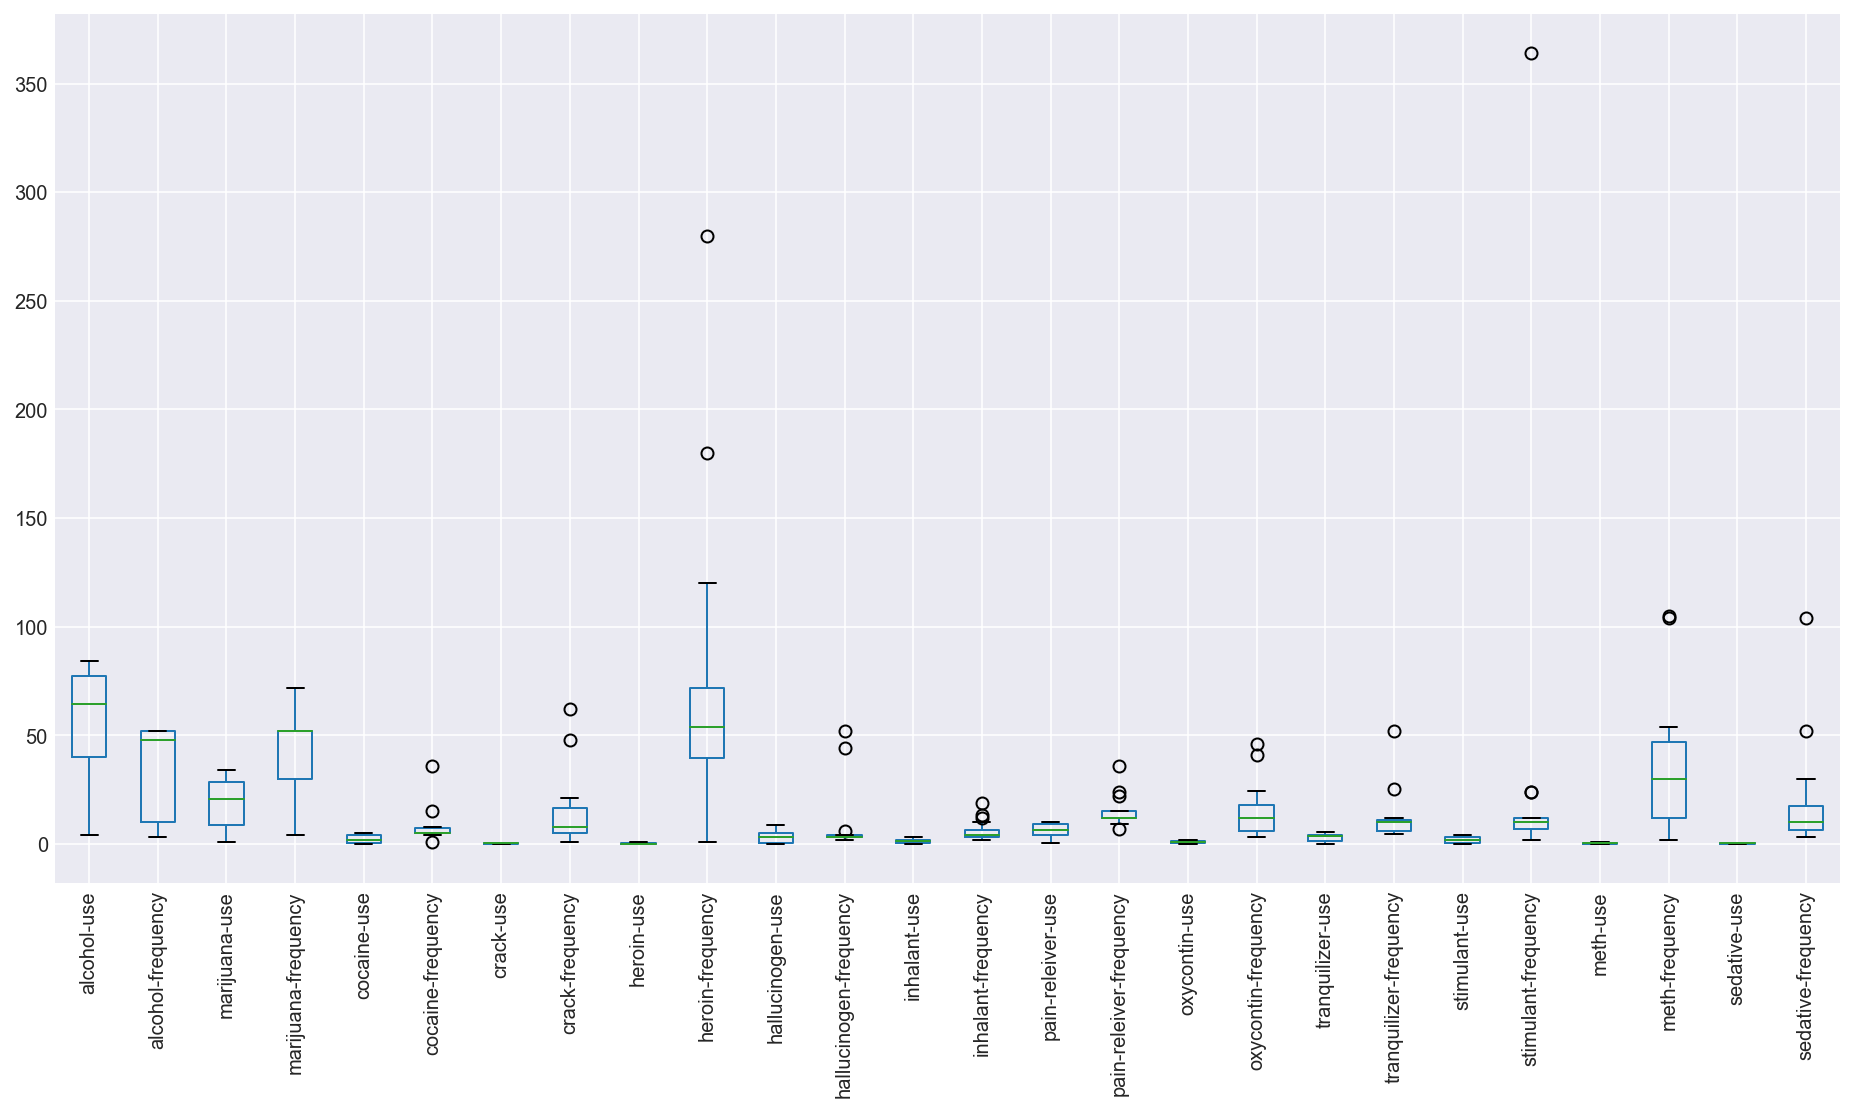

In [124]:
drug.drop(['age', 'n'],axis=1).boxplot(figsize = (16,8), rot = 90)

# Outliners cleaning function

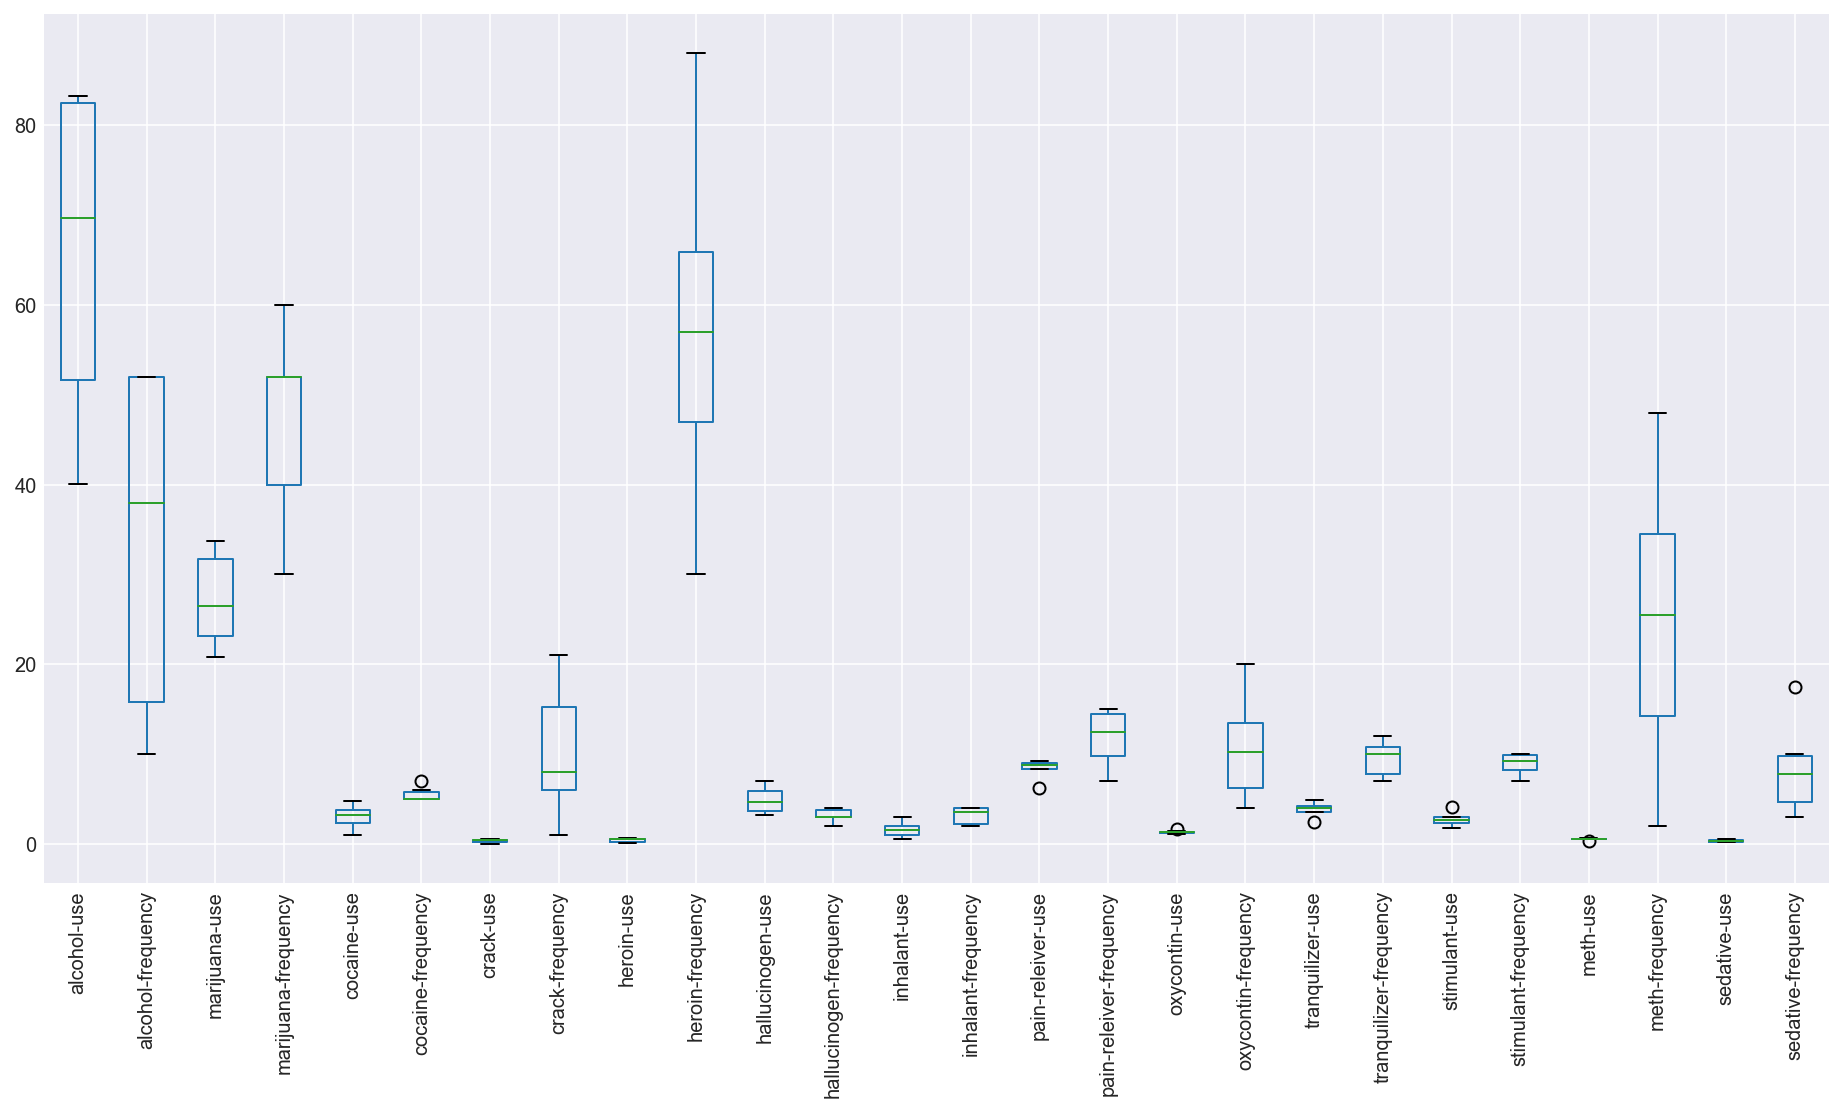

In [125]:
# I coded the for loops myself, and function from google.

df_x_outliers = drug
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

outliners_list = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']

for clean_col in outliners_list:
    df_x_outliers = remove_outlier(df_x_outliers, clean_col)
    
df_x_outliers.drop(['age', 'n'],axis=1).boxplot(figsize = (16,8), rot = 90)

# Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original.

In [126]:
df_x_outliers.describe().loc[['mean','std','50%']]    # CLEANED Without outliers

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
mean,3023.000000,65.850000,33.833333,27.150000,47.000000,3.033333,5.50000,0.316667,10.166667,0.416667,...,1.333333,10.666667,3.866667,9.500000,2.766667,8.916667,0.55000,24.833333,0.333333,8.333333
std,821.045188,19.011549,20.439341,5.382472,11.436783,1.364795,0.83666,0.213698,7.521081,0.263944,...,0.206559,6.047038,0.854790,2.073644,0.776316,1.200694,0.13784,16.666333,0.121106,5.250397
50%,2833.000000,69.700000,38.000000,26.450000,52.000000,3.200000,5.00000,0.400000,8.000000,0.500000,...,1.300000,10.250000,4.050000,10.000000,2.700000,9.250000,0.60000,25.500000,0.350000,7.750000


In [127]:
drug.describe().loc[['mean','std','50%']]               # Dirty with outliers

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000


# With vs Without outliers => What is different about them and why? 

Noel: It is observed that all mean/std/medium has changed since the number of values is different now. 
Noel: Outliers are not always bad data. It could come from random variation or human error. Yet it could also be an indication that something scientifically interesting that is worth spending time to go into depth. Therefore, my conclusion is, we should not simply delete the outlying observation before a through investigation.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


# Spearman vs Pearson

In [128]:
print 'Spearman :' + str(stats.spearmanr(sat_scores['Verbal'], sat_scores['Math']))
print 'Pearson :' + str(stats.ttest_ind(sat_scores['Verbal'], sat_scores['Math']))

Spearman :SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)
Pearson :Ttest_indResult(statistic=0.07640124623882805, pvalue=0.9392495359502077)


Spearman correlation is used when measuring the relationship betwen two variables:
        1. where variables are ordinal.
        2. when relationship is related, but not linearly.
    

In [129]:
#Describe clearly in words the process of calculating the spearman rank #correlation. Hint: the word "rank" is in the name of the process for a #reason!
#Noel : Spearman for Verbal and Math. 
#- Sum of Verbal + Sum of Math = VM
import math
verbal_sum = sat_scores['Verbal'].sum() # Ans 27665
math_sum = sat_scores['Math'].sum()   # Ans 27638
VM = math_sum + verbal_sum   # 55303
#- Find the length of both varible
length = len(sat_scores['Math'])  # Ans 52
#- Dump into numerator  of the formula.
numerator = (VM) - ((math_sum * verbal_sum) / length)   #  -14648644
# sum of Verbal square
vsum = sum([i**2 for i in sat_scores['Verbal']])
# sum of Math square
msum = sum([i**2 for i in sat_scores['Math']])
d_left = math.sqrt(msum - ((math_sum)**2)/length)
d_right = math.sqrt(msum - ((math_sum)**2)/length)
spearman = numerator/(d_left*d_right)
spearman

-221.4425178757691

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

## Noel: Convert Rate to percentiles in the sat scores as a new column.

In [130]:
PC100=np.percentile(sat_scores['Rate'], 100)
sat_scores['Rate_percentile'] = sat_scores['Rate'].map(lambda x: float(x)/PC100)
sat_scores_percentile = sat_scores.drop(['Verbal','Math', 'Verbal_percent', 'Math_percent','Difference'], axis=1)
sat_scores_percentile.head()

,State,Rate,Rate_percentile
0,CT,82,1.000000
1,NJ,81,0.987805
2,MA,79,0.963415
3,NY,77,0.939024
4,NH,72,0.878049


## Noel: Show the percentile of California in Rate.

In [131]:
sat_scores_percentile[sat_scores_percentile['State']=='CA']

,State,Rate,Rate_percentile
23,CA,51,0.621951


## Noel: How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

# Why might percentile scoring be useful for dealing with outliers?

AS mentioned previously, outliers are points larger than Q3 (75% percentile) by at least 1.5 times the interquartile range (IQR), or smaller than Q1(25% Percentile) by at least 1.5 times the IQR.

<img src="https://i.imgur.com/8Kec6uc.png">

# Plot the distribution of a variable of your choice from the drug use dataset.

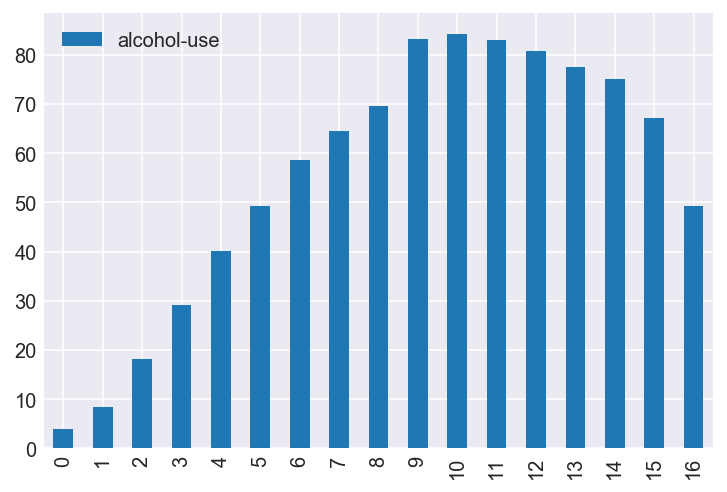

In [132]:
drug[['alcohol-use']].plot(kind='bar')

# Plot the same variable but percentile scored.

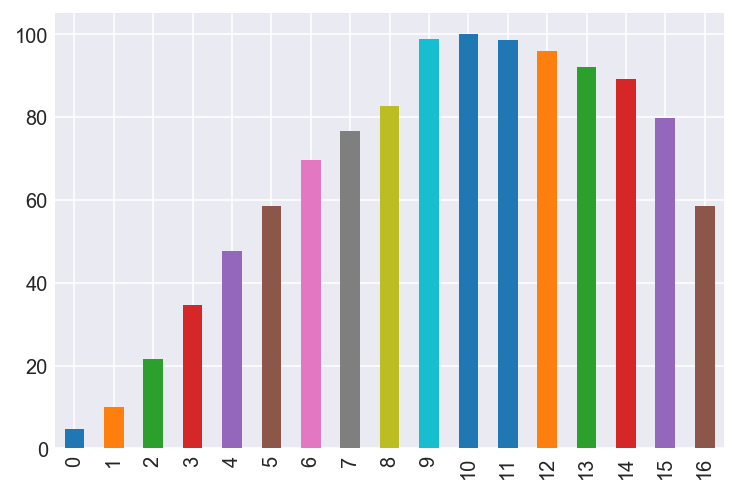

In [133]:
PC100=np.percentile(drug['alcohol-use'], 100)
drug['alcohol_percentiles'] = drug['alcohol-use'].map(lambda x: float(x)*100/PC100)
drug['alcohol_percentiles'].plot(kind='bar')

# Describe the effect, visually, of coverting raw scores to percentile.
Noel: Both plots shaped the same, except for their Y-axis, where alcohol_percentiles are plotted with its percentile scores.